# The goal here is to benchmark the DpoDetection tool with other depolymerase detection tools 
***
# I. Gathering the testing Data :
#### 77 phages candidates 
>Detected Dpos <br>
>Missed Dpos <br>
#### Beas Dpos
#### Training set of the DpoDetection tool
#### Pires Dpos ?
***
# II. Getting the resulting predictions
***
# III. Make figures
***

I.
> 77 Phages : Detected Dpos

In [2]:
import pandas as pd
import os 
import pprint
pp = pprint.PrettyPrinter(width = 100, compact = True)

path_project = "/media/concha-eloko/Linux/77_strains_phage_project"
dir_out = f"{path_project}/seekfold_out"
path_info = f"/media/concha-eloko/Linux/depolymerase_building/depolymerase_fold.csv"

outputs = [f"{dir_out}/{file}" for file in os.listdir(dir_out) if file[-3:]=="out"]

info_df = pd.read_csv(path_info , sep = "\t", header = 0)

header_seekfold = ["query","target","pident","alnlen","gapopen","qstart","qend","tstart","tend","bits","prob"]
phages_depo = {}

depo_df = pd.read_csv(f"{path_project}/depo_list.3004.tsv", sep="\t" , header = 0)

for _,row in depo_df.iterrows() :
    if row["Phage"] not in phages_depo :
        phages_depo[row["Phage"]] = [row["CDS"]]
    else :
        phages_depo[row["Phage"]].append(row["CDS"])
        
for phage in os.listdir(f"{path_project}/annotation_classic") :
    if phage not in phages_depo :
        phages_depo[phage] = []

In [3]:
from Bio import SeqIO

path_project = "/media/concha-eloko/Linux/77_strains_phage_project"
path_Dpo_f = f"{path_project}/rbp_work/77_full_Dpo"
path_Dpo_d = f"{path_project}/rbp_work/77_domain_Dpo"
path_pdb = f"{path_project}/77_phages_out"
path_Dpo_domain_org = "/media/concha-eloko/Linux/depolymerase_building/clean_77_phages_depo"

with open(f"{path_project}/DetectedDpo.77_phages.multi.fnn" , "w") as outfile : 
    for phage in phages_depo :
        if len(phages_depo[phage]) > 0 :
            multi_fasta = SeqIO.parse(f"{path_project}/annotation_classic/{phage}/{phage}.multi.annotated.fnt","fasta")
            for record in multi_fasta :
                cds = record.description.split(",")[0].split(" ")[1]
                if cds in phages_depo[phage] :
                    #outfile.write(f">{phage}_{cds}\n{record.seq}\n")
                    outfile.write(f">{record.description}\n{record.seq}\n")
                

In [ ]:
from Bio import SeqIO

path_project = "/media/concha-eloko/Linux/77_strains_phage_project"
path_Dpo_f = f"{path_project}/rbp_work/77_full_Dpo"
path_Dpo_d = f"{path_project}/rbp_work/77_domain_Dpo"
path_pdb = f"{path_project}/77_phages_out"
path_Dpo_domain_org = "/media/concha-eloko/Linux/depolymerase_building/clean_77_phages_depo"

with open(f"{path_project}/DetectedDpo.77_phages.multi.fasta" , "w") as outfile : 
    for phage in phages_depo :
        if len(phages_depo[phage]) > 0 :
            multi_fasta = SeqIO.parse(f"{path_project}/annotation_classic/{phage}/{phage}.multi.annotated.faa","fasta")
            for record in multi_fasta :
                cds = record.description.split(",")[0].split(" ")[1]
                if cds in phages_depo[phage] :
                    #outfile.write(f">{phage}_{cds}\n{record.seq}\n")
                    outfile.write(f">{record.description}\n{record.seq}\n")
                


> 77 Phages : The missed Dpos 

In [7]:
import pandas as pd
import os 
import pprint
pp = pprint.PrettyPrinter(width = 100, compact = True)

path_project = "/media/concha-eloko/Linux/77_strains_phage_project"
dir_out = f"{path_project}/seekfold_out"
path_info = f"/media/concha-eloko/Linux/depolymerase_building/depolymerase_fold.csv"

missed_depo_df = pd.read_csv(f"{path_project}/missed_dpo.1306.tsv", sep="\t" , header = 0)

phages_depo = {}
for _,row in missed_depo_df.iterrows() :
    if row["Phage"] not in phages_depo :
        phages_depo[row["Phage"]] = [row["CDS"]]
    else :
        phages_depo[row["Phage"]].append(row["CDS"])

        
from Bio import SeqIO

path_project = "/media/concha-eloko/Linux/77_strains_phage_project"
path_Dpo_f = f"{path_project}/rbp_work/77_full_Dpo"
path_Dpo_d = f"{path_project}/rbp_work/77_domain_Dpo"
path_pdb = f"{path_project}/77_phages_out"
path_Dpo_domain_org = "/media/concha-eloko/Linux/depolymerase_building/clean_77_phages_depo"

with open(f"{path_project}/MissedDpos.77_phages.multi.fasta" , "w") as outfile : 
    for phage in phages_depo :
        if len(phages_depo[phage]) > 0 :
            multi_fasta = SeqIO.parse(f"{path_project}/annotation_classic/{phage}/{phage}.multi.annotated.faa","fasta")
            for record in multi_fasta :
                cds = record.description.split(",")[0].split(" ")[1]
                if cds in phages_depo[phage] :
                    #outfile.write(f">{phage}_{cds}\n{record.seq}\n")
                    outfile.write(f">{record.description}\n{record.seq}\n")
                


> Beas Dpos :


### 

> Trianing dataset  :

In [34]:
from tqdm import tqdm
from Bio import SeqIO
import os 
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

#model_path = "/home/conchae/PhageDepo_pdb/script_files/models/esm2_t30_150M_UR50D-finetuned-depolymerase/checkpoint-198"

path_work = "/media/concha-eloko/Linux/depolymerase_building"

In [31]:
df_depo = pd.read_csv(f"{path_work}/Dpo_domains.phagedepo.0805.final.tsv" , sep = "\t" , header = 0)

df_depo_work =  df_depo[df_depo["Fold"].isin(["right-handed beta-helix", "6-bladed beta-propeller"])]

In [32]:
negative_dataset = pd.read_csv(f"{path_work}/negative_sequences.multi.tsv", sep = "\t", names = ["annotation","prot_id","sequence"])
negative_dataset["Label"] = 0 

tmp_neg_df = negative_dataset[["sequence","Label"]]
tmp_neg_df

df_depo_work["Label"] = 1
tmp_pos_df = df_depo_work[["Full_seq", "Label"]]
tmp_pos_df = tmp_pos_df.rename(columns = {"Full_seq" : "sequence"})

/tmp/ipykernel_76178/319287805.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_depo_work["Label"] = 1


In [35]:
Dataset_df = pd.concat([tmp_pos_df , tmp_neg_df], axis = 0, ignore_index=True)

X_train, X_test, y_train, y_test = train_test_split(Dataset_df, Dataset_df["Label"], test_size=0.25, random_state=42)


In [39]:
X_test[X_test["Label"] == 1]

,sequence,Label
420,MNILRSFTETVVTTPTDTFSISFEYDEKYDAVHVFLNDVAVEDLGY...,1
613,MNELFSQGGKGSTGILTNKQAVARHFGVKQSEVVYFSVGAVLSGYK...,1
429,MYAVKDAIQDFTDLPYYAKPGMILQITGEEGDTLSDYYVNFVANGV...,1
527,MANSLMQLVSDGNLSVVPLTIKFFEQSHISVYIDDVVLPTAGYSYA...,1
651,MISQFNQPRGSTSIEVNKQSIARNFGVKEDEVIYFTVGIDLSGFKV...,1
...,...,...
519,MSTMNGGAGGILVLPGQNGGTAGNKPTSKPQPPSLQDIISGSEKTV...,1
598,MISQFNQPRGSTSIEVNKQSIARNFGVKEDEVVYFSSGINLGGFKV...,1
465,MATNSTNTDYRRSGNFWAGGVVTDEYSIIQDEDGNWYRYVGVRPKP...,1
199,MGYFQMTRNVEELFGGVITAPHQIPFTYKSNVGGETFLSLPFYPVT...,1


In [15]:
with open(f"{path_work}/training_set.short.fasta" , "w") as outfile :
    for index,row in Dataset_df.iterrows() :
        if index < 500 :
            outfile.write(f">{row['Label']}__{index}\n{row['sequence']}\n")

> Pires Dpos :

***
***
II.
> Make the predictions : DpoDetection Tool :

In [ ]:
rsync -avzhe ssh \
conchae@garnatxa.srv.cpd:/home/conchae/PhageDepo_pdb/DepoDetection.S1.conv.model \
/media/concha-eloko/Linux/depolymerase_building

In [49]:
from transformers import AutoModelForTokenClassification, AutoTokenizer
import torch
from torch import nn 
import torch.nn.functional as F

import os
import numpy as np
import tqdm
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

path_work = "/media/concha-eloko/Linux/depolymerase_building"

esm2_model_path = f"{path_work}/esm2_t12_35M_UR50D-finetuned-depolymerase/checkpoint-198/"
DpoDetection_path = f"{path_work}/DepoDetection.S1.conv.model"

tokenizer = AutoTokenizer.from_pretrained(esm2_model_path)
esm2_finetuned = AutoModelForTokenClassification.from_pretrained(esm2_model_path)


Some weights of the model checkpoint at /media/concha-eloko/Linux/depolymerase_building/esm2_t12_35M_UR50D-finetuned-depolymerase/checkpoint-198/ were not used when initializing EsmForTokenClassification: ['esm.contact_head.regression.weight', 'esm.contact_head.regression.bias']
- This IS expected if you are initializing EsmForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing EsmForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [42]:
class Dpo_classifier(nn.Module):
    def __init__(self, pretrained_model):
        super(Dpo_classifier, self).__init__()
        self.max_length = 1024
        self.pretrained_model = pretrained_model
        self.conv1 = nn.Conv1d(1, 64, kernel_size=5, stride=1)  # Convolutional layer
        self.fc1 = nn.Linear(64 * (self.max_length - (5 - 1)), 32)  # calculate the output shape after 1 conv layer
        self.classifier = nn.Linear(32, 2)  # Binary classification

    def make_prediction(self, fasta_txt):
        input_ids = tokenizer.encode(fasta_txt, truncation=True, return_tensors='pt')
        with torch.no_grad():
            outputs = self.pretrained_model(input_ids)
            probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
            token_probs, token_ids = torch.max(probs, dim=-1)            
            tokens = token_ids.view(1, -1) # ensure 2D shape
            return tokens

    def pad_or_truncate(self, tokens):
        if tokens.size(1) < self.max_length:
            tokens = F.pad(tokens, (0, self.max_length - tokens.size(1)))
        elif tokens.size(1) > self.max_length:
            tokens = tokens[:, :self.max_length]
        return tokens

    def forward(self, sequences):
        batch_size = len(sequences)
        tokens_batch = []
        for seq in sequences:
            tokens = self.make_prediction(seq)
            tokens = self.pad_or_truncate(tokens)
            tokens_batch.append(tokens)
        
        outputs = torch.cat(tokens_batch).view(batch_size, 1, self.max_length)  # ensure 3D shape
        outputs = outputs.float()  # Convert to float
        
        out = F.relu(self.conv1(outputs))
        out = out.view(batch_size, -1)  # Flatten the tensor
        out = F.relu(self.fc1(out))
        out = self.classifier(out)
        return out, outputs


In [43]:
model_classifier = Dpo_classifier(esm2_finetuned) # Create an instance of Dpo_classifier
model_classifier.load_state_dict(torch.load(DpoDetection_path), strict = False) # Load the saved weights ; weird Error with some of the keys 
model_classifier.eval() # Set the model to evaluation mode for inference


Dpo_classifier(
  (pretrained_model): EsmForTokenClassification(
    (esm): EsmModel(
      (embeddings): EsmEmbeddings(
        (word_embeddings): Embedding(33, 480, padding_idx=1)
        (position_embeddings): Embedding(1026, 480, padding_idx=1)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (encoder): EsmEncoder(
        (layer): ModuleList(
          (0): EsmLayer(
            (attention): EsmAttention(
              (self): EsmSelfAttention(
                (query): Linear(in_features=480, out_features=480, bias=True)
                (key): Linear(in_features=480, out_features=480, bias=True)
                (value): Linear(in_features=480, out_features=480, bias=True)
                (dropout): Dropout(p=0.0, inplace=False)
                (rotary_embeddings): RotaryEmbedding()
              )
              (output): EsmSelfOutput(
                (dense): Linear(in_features=480, out_features=480, bias=True)
                (dropout): Dropout(p=0.0, inplace=False

In [45]:
def predict_sequence(model, sequence , name = ""):
    model.eval()  
    with torch.no_grad():   
        outputs, sequence_outputs = model([sequence])
        probas = torch.nn.functional.softmax(outputs, dim=-1)
        predictions = torch.argmax(probas, dim=1)  
        sequence_outputs_list = sequence_outputs.cpu().numpy().tolist()[0][0]  
        prob_predicted = probas[0][predictions].item()
        return (predictions.item(), prob_predicted), sequence_outputs_list , name

def plot_token(tokens) :
    tokens = np.array(tokens)  # convert your list to numpy array for convenience
    plt.figure(figsize=(10,6))
    for i in range(len(tokens) - 1):
        if tokens[i] == 0:
            color = 'black'
        elif tokens[i] == 1:
            color = 'blue'
        else:
            color = 'red'
        plt.plot([i, i+1], [tokens[i], tokens[i+1]], color=color, marker='o')
    plt.xlabel('Token')
    plt.ylabel('Label')
    plt.title('Label for each token')
    plt.xticks(rotation='vertical')
    plt.yticks(np.arange(2), ['0', '1'])  
    plt.grid(True)
    plt.show()

In [25]:

prediction, sequence_outputs, name = predict_sequence(model_classifier, input_text)


(0, 0.9970245957374573) K72PH164C2 cds_55, tail fiber protein


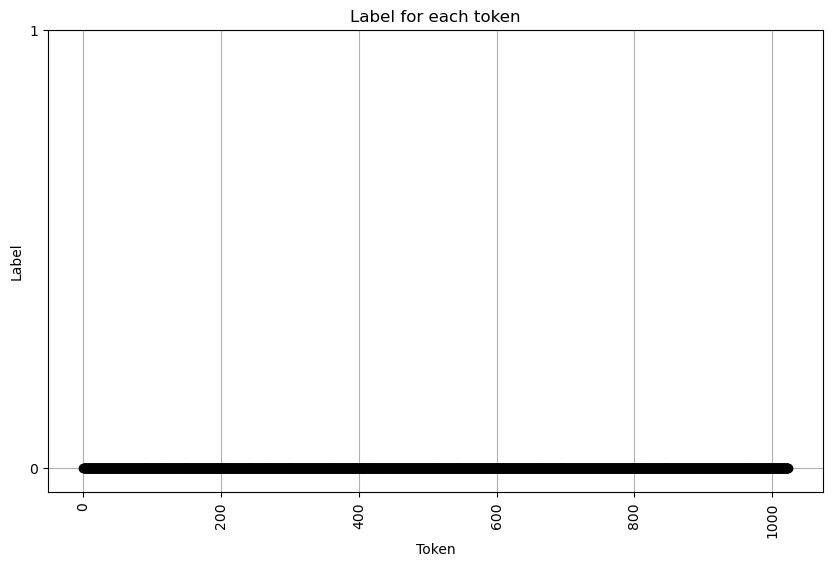

(0, 0.8771181702613831) K33PH14C2 cds_25, tail fiber protein


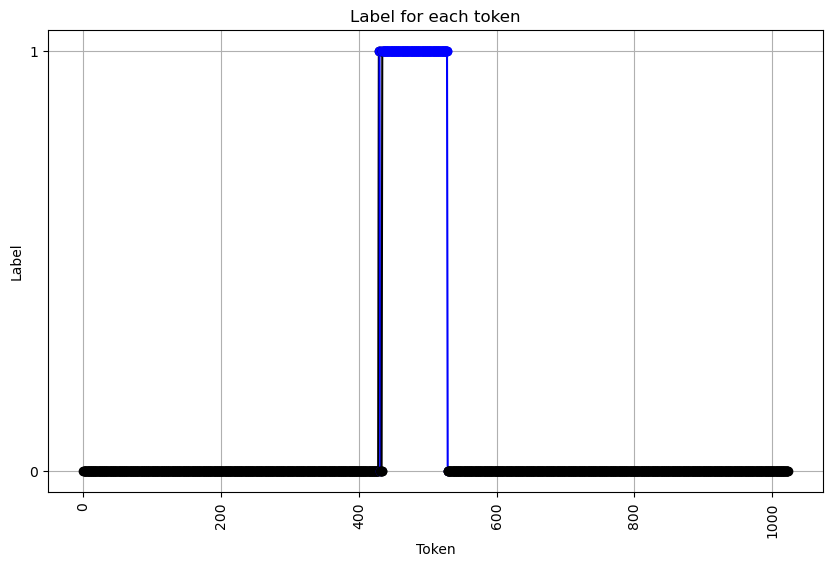

(0, 0.8771181702613831) K31PH164 cds_25, tail fiber protein


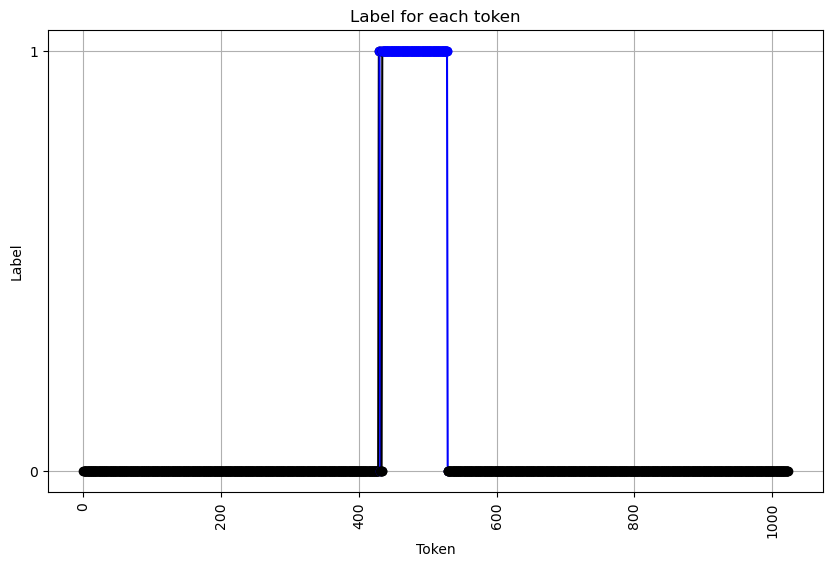

(0, 0.9111883640289307) K52PH129C1 cds_25, tail fiber protein


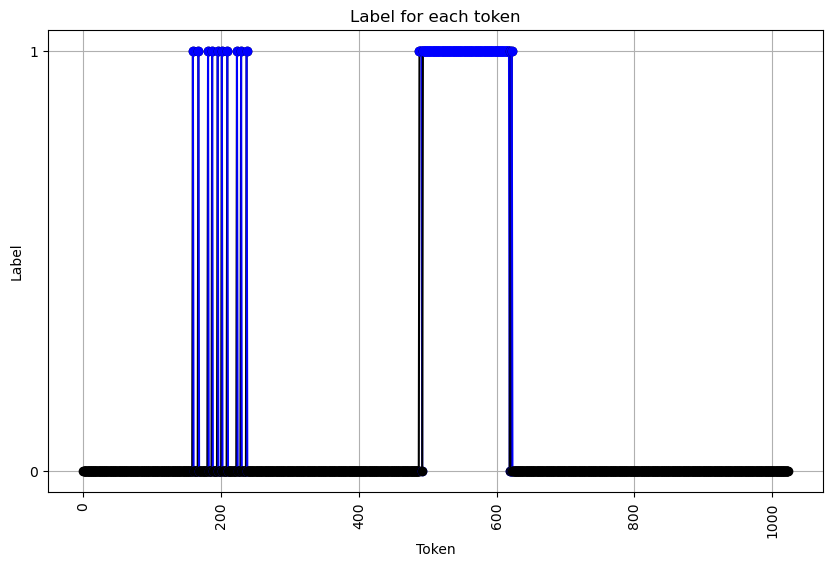

(0, 0.8492670655250549) K69PH164C2 cds_24, tail fiber protein


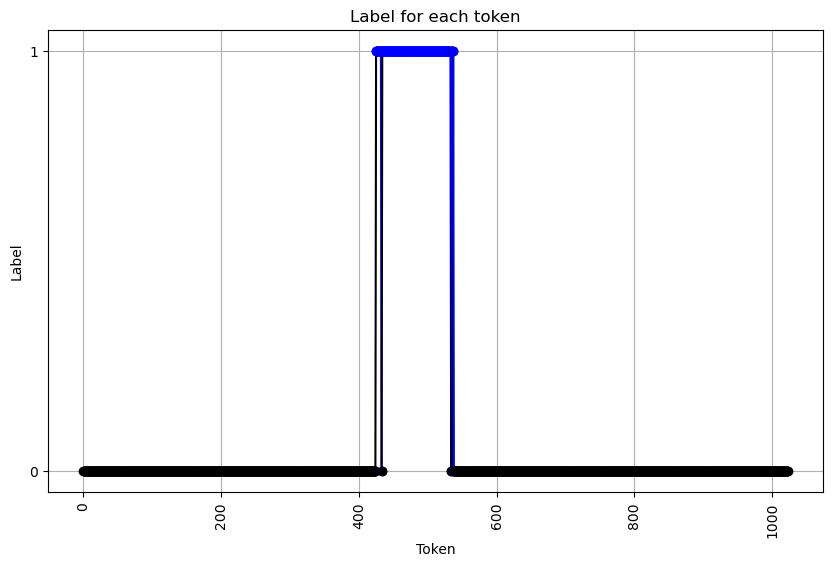

(0, 0.7310010194778442) K28PH129 cds_24, tail fiber protein


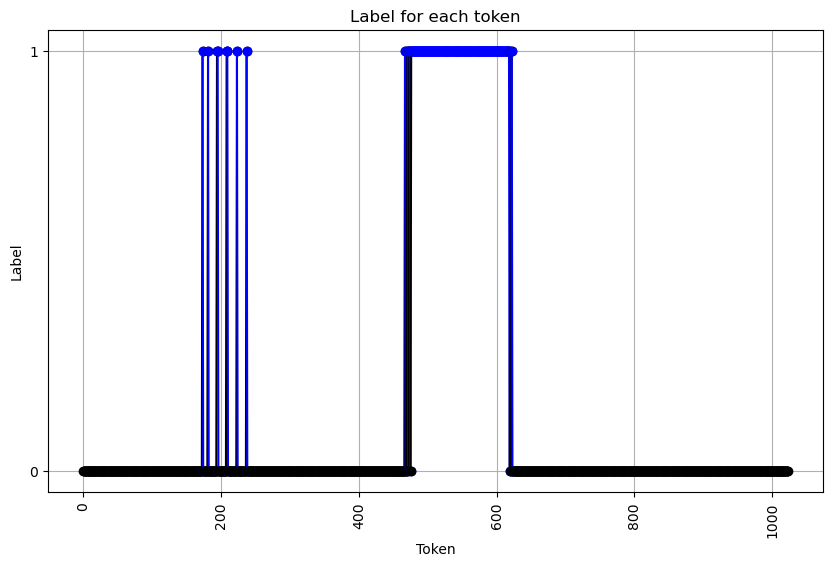

(0, 0.7214770317077637) K2064PH2 cds_25, tail fiber protein


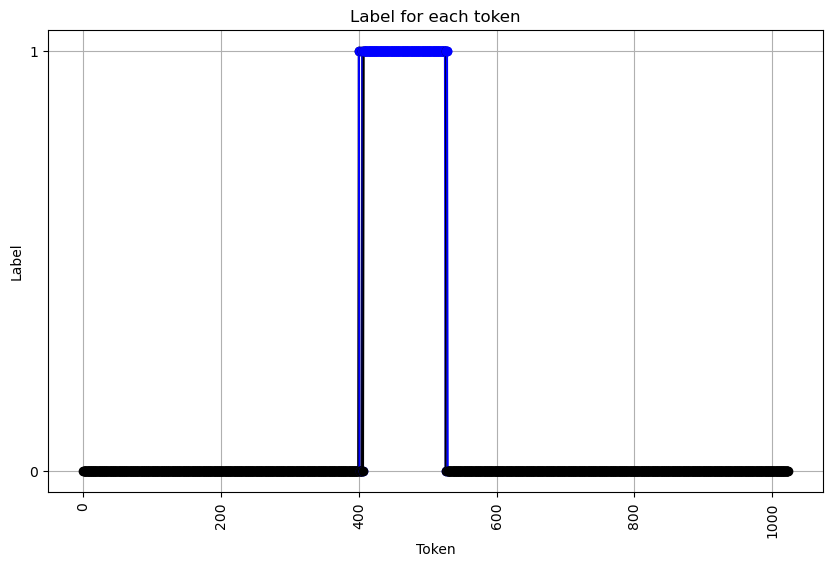

(0, 0.9970245957374573) K19PH14C4P1 cds_48, tail fiber protein


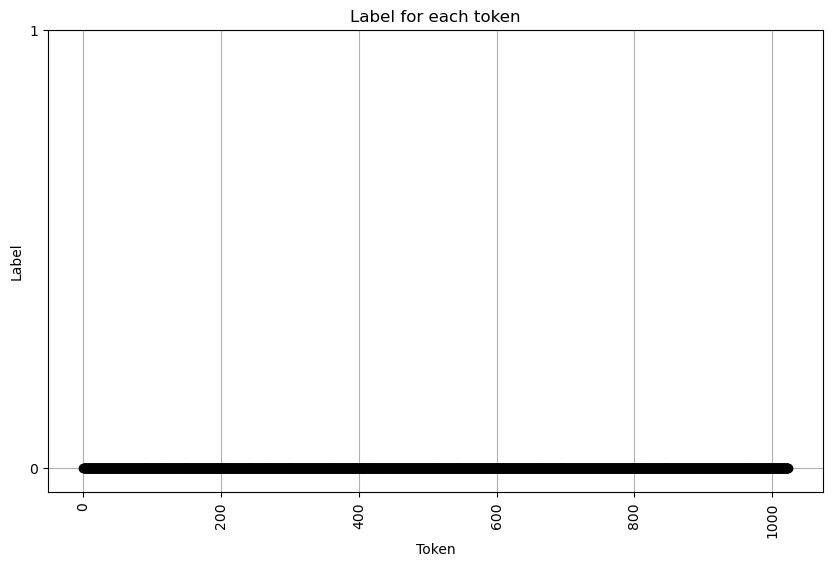

(0, 0.9970245957374573) K50PH164C1 cds_28, tail fiber protein


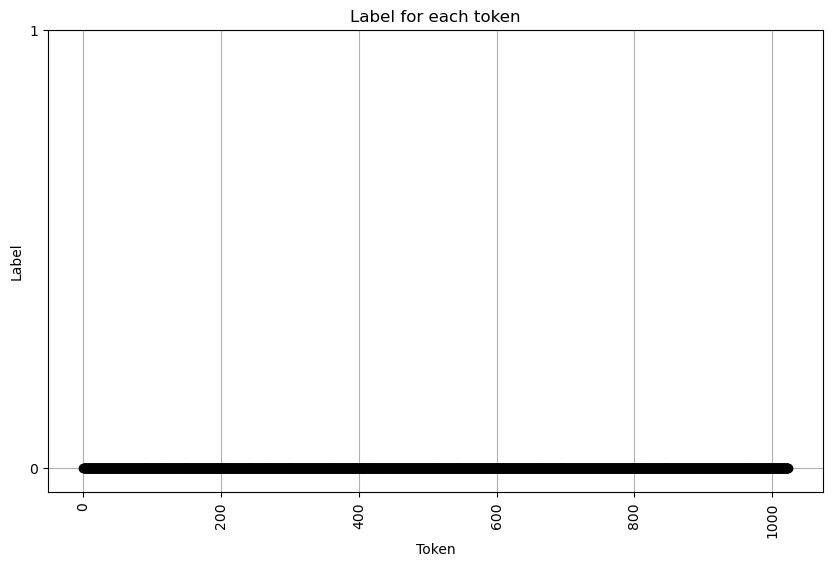

(0, 0.6813420057296753) K62PH164C2 cds_25, tail fiber protein


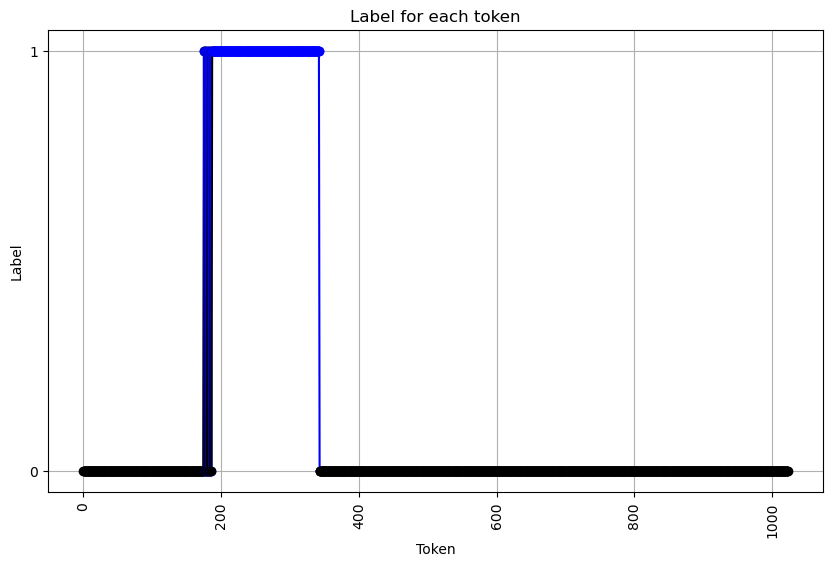

In [51]:
from Bio import SeqIO
import os

#path_fasta = f"/media/concha-eloko/Linux/77_strains_phage_project/DetectedDpo.77_phages.multi.fasta"
path_fasta = f"/media/concha-eloko/Linux/77_strains_phage_project/MissedDpos.77_phages.multi.fasta"

fastas = SeqIO.parse(path_fasta , "fasta")
for record in fastas :
    prediction, sequence_outputs, name = predict_sequence(model_classifier, str(record.seq) , record.description)
    if prediction[0] == 0 :
        print(prediction , name)
        plot_token(sequence_outputs)

> Make the predictions : Measuring the performances of DePolymerase Predictor
(https://timskvortsov.github.io/WebDePP/)